In [1]:
import os

## switch to the root dir

In [2]:
os.chdir('..')
os.listdir()

['.git',
 '.gitignore',
 '.idea',
 'data_loader',
 'data_processor',
 'jupyter',
 'loggers',
 'main.py',
 'model',
 'models',
 'original_data',
 'processed_data',
 'README.md',
 'requirements.txt',
 'saved_models',
 'trainers']

In [3]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
from models.MLP import MLP
import trainers.SGD_trainer
from loggers.statistics_loggers import plot_numerical_arrays
import torch
from torch import nn

## Load preprocessed data

In [4]:
data_train, data_val = load_numpy_arrays(['data_train.npy', 'data_val.npy'], 
                                            path_prefix='processed_data/processed_features/10-genres/')

In [5]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]

In [6]:
X_train, y_train, X_val, y_val = numpy_to_tensor([X_train, y_train, X_val, y_val])

In [7]:
y_train = y_train.type(torch.int64)
y_val = y_val.type(torch.int64)

In [8]:
print(X_train.shape)
print(y_train.shape)

torch.Size([800, 57])
torch.Size([800])


In [9]:
print(X_train[0])
print(y_train[0])

tensor([ 0.4430,  0.7689,  1.1854,  0.9865,  1.1729,  2.2850,  1.5993,  0.5470,
         1.2933,  1.4533,  0.3579,  1.6253,  0.2378,  0.9808,  0.3478,  1.0291,
         0.8722,  0.6536,  0.1507, -1.0807,  0.9324,  1.5295,  1.6476, -0.6216,
         1.2637,  1.2384,  0.5888, -0.9140,  2.3868,  2.1714,  1.2330, -0.8752,
         1.5690,  1.2485,  0.6235, -0.4043,  0.5381,  1.3089,  0.5665, -0.1021,
         0.4306,  1.0201, -0.0346,  0.0734,  0.1968,  0.4319, -0.1783, -1.0909,
        -0.1586,  0.6607, -0.2541, -0.3802, -0.1895,  0.4879, -0.3387,  0.0709,
        -0.0540])
tensor(7)


In [10]:
print(X_val.shape)
print(y_val.shape)




torch.Size([100, 57])
torch.Size([100])


In [11]:
# define a model instance
# eg. MLP

model = MLP(57, 10, [100])

## Define loss and optimizer

In [12]:
lr = 0.01
batch_size = 100
num_epoch = 20
model_name = 'MLP'
saved_model_name = 'saved_models/saved_' + model_name + '_csv.pt'

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train

use trainers.SGD_trainer.train or define a trainer

parameters of SGD_trainer.train
- model
- train_array: a tuple (X_train, y_train, X_val, y_val)
- loss
- optimizer
- batch_size
- num_epoch
- device

In [14]:
training_loss_array, training_accuracy_array, validation_loss_array, validation_accuracy_array = trainers.SGD_trainer.train(model, (X_train, y_train, X_val, y_val), 
                                                                                                                            loss, optimizer, batch_size=batch_size, num_epoch=num_epoch, saved_model_name=saved_model_name)

Epoch  0: loss on final training batch: 1.4152
training accuracy: 49.75% validation accuracy: 52.00%
Epoch  1: loss on final training batch: 1.0845
training accuracy: 63.38% validation accuracy: 69.00%
Epoch  2: loss on final training batch: 0.8241
training accuracy: 74.88% validation accuracy: 73.00%
Epoch  3: loss on final training batch: 0.6554
training accuracy: 80.12% validation accuracy: 73.00%
Epoch  4: loss on final training batch: 0.5093
training accuracy: 83.75% validation accuracy: 74.00%
Epoch  5: loss on final training batch: 0.4113
training accuracy: 88.88% validation accuracy: 76.00%
Epoch  6: loss on final training batch: 0.3394
training accuracy: 92.50% validation accuracy: 77.00%
Epoch  7: loss on final training batch: 0.2789
training accuracy: 93.38% validation accuracy: 76.00%
Epoch  8: loss on final training batch: 0.2298
training accuracy: 95.12% validation accuracy: 78.00%
Epoch  9: loss on final training batch: 0.1817
training accuracy: 96.50% validation accurac

## Plot

plot_numerical_arrays: plot multiple arrays with the same length

parameters:
- num_arrays: numerical arrays with the same length
- labels: labels of each array(with the same order of num_arrays)
- xlabel
- ylabel
- title

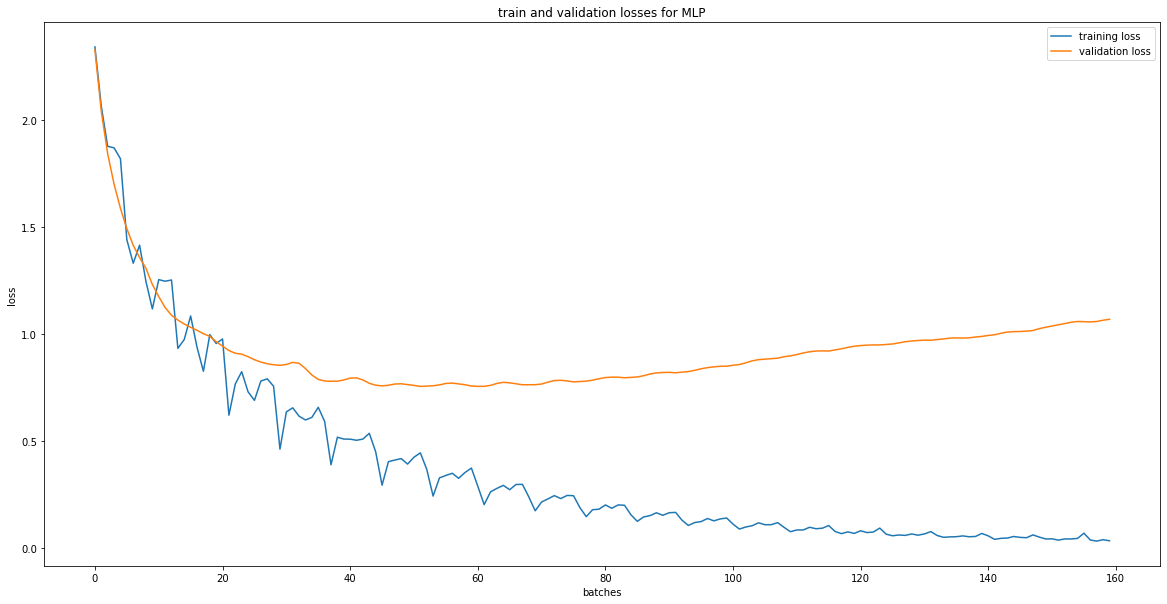

In [15]:
plot_numerical_arrays([training_loss_array, validation_loss_array], ['training loss', 'validation loss'], 
                      xlabel='batches', ylabel='loss', title='train and validation losses for ' + model_name)

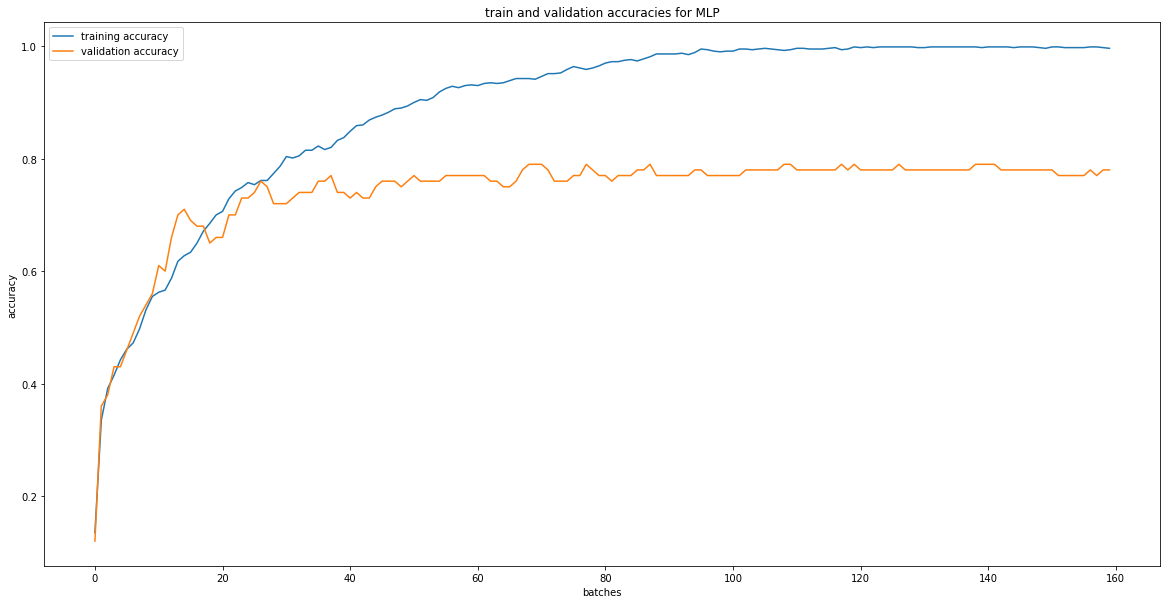

In [16]:
plot_numerical_arrays([training_accuracy_array, validation_accuracy_array], ['training accuracy', 'validation accuracy'], 
                      xlabel='batches', ylabel='accuracy', title='train and validation accuracies for ' + model_name)